load and explore the data

In [7]:
import pandas as pd

In [14]:


# Try different encodings
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")

# Display the first 5 rows
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [15]:
print(df.info)
print(df.isnull().sum())#isnull checks for missing values and sum() is for adding the count of missing values

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


store data in sql

In [17]:
import sqlite3


In [32]:
import pandas as pd

conn = sqlite3.connect("sales.db")  # Connect to the database
df = pd.read_sql("SELECT * FROM sales LIMIT 5;", conn)  # Read a sample

print(df.columns)  # Show column names


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [40]:
import sqlite3
import pandas as pd

# Connect to SQLite database (or create it)
conn = sqlite3.connect("sales.db")

# Load the CSV file
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")  # Use latin1 to avoid Unicode errors

# Save DataFrame to SQLite
df.to_sql("sales", conn, if_exists="replace", index=False)  # Creates the "sales" table

# Verify if the table is created
df_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(df_tables)


    name
0  sales


In [41]:
df_sales = pd.read_sql("SELECT COUNTRY, SUM(SALES) as Total_Sales FROM sales GROUP BY COUNTRY;", conn)
print(df_sales)


        COUNTRY  Total_Sales
0     Australia    630623.10
1       Austria    202062.53
2       Belgium    108412.62
3        Canada    224078.56
4       Denmark    245637.15
5       Finland    329581.91
6        France   1110916.52
7       Germany    220472.09
8       Ireland     57756.43
9         Italy    374674.31
10        Japan    188167.81
11       Norway    307463.70
12  Philippines     94015.73
13    Singapore    288488.41
14        Spain   1215686.92
15       Sweden    210014.21
16  Switzerland    117713.56
17           UK    478880.46
18          USA   3627982.83


<ipython-input-42-0a3ed26c04fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sales["Total_Sales"], y=df_sales["COUNTRY"], palette="viridis")


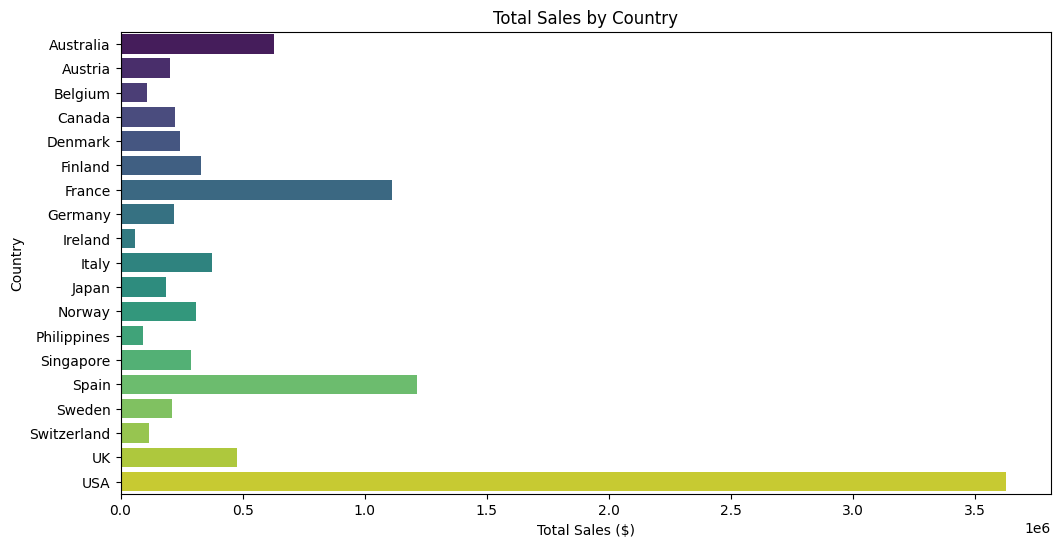

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=df_sales["Total_Sales"], y=df_sales["COUNTRY"], palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Country")
plt.title("Total Sales by Country")
plt.show()


In [43]:
top_country = df_sales.loc[df_sales["Total_Sales"].idxmax()]
bottom_country = df_sales.loc[df_sales["Total_Sales"].idxmin()]
print("📈 Best Performing Country:", top_country)
print("📉 Worst Performing Country:", bottom_country)


📈 Best Performing Country: COUNTRY               USA
Total_Sales    3627982.83
Name: 18, dtype: object
📉 Worst Performing Country: COUNTRY         Ireland
Total_Sales    57756.43
Name: 8, dtype: object


In [44]:
df_monthly_sales = pd.read_sql("SELECT MONTH_ID, SUM(SALES) as Total_Sales FROM sales GROUP BY MONTH_ID;", conn)
print(df_monthly_sales)


    MONTH_ID  Total_Sales
0          1    785874.44
1          2    810441.90
2          3    754501.39
3          4    669390.96
4          5    923972.56
5          6    454756.78
6          7    514875.97
7          8    659310.57
8          9    584724.27
9         10   1121215.22
10        11   2118885.67
11        12    634679.12
